# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Output file (CSV)
output_data_file = "output_data/cities.csv"

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)  #variable that holds an iterator for easy access to these coordinate pairs.

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL

base_url = "https://api.openweathermap.org/data/2.5/weather?"  #set base url
base_url_with_key = f"{base_url}?appid={weather_api_key}"  #pass api_key to base url

# final base url with api_key and units
#build base URL (url= f"{url}appid={api_key}&units={units}&q=")
units = "metric"   #For temperature in Fahrenheit use units

url = "https://api.openweathermap.org/data/2.5/weather?APPID={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city  #concatenate base url to city name
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-vila
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | puerto natales
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | saipan
Processing Record 7 of Set 1 | iqaluit
Processing Record 8 of Set 1 | mili
Processing Record 9 of Set 1 | hinton
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | floro
Processing Record 12 of Set 1 | bilibino
Processing Record 13 of Set 1 | bhamo
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | nova vicosa
Processing Record 16 of Set 1 | cabo san lucas
Processing Record 17 of Set 1 | taltal
Processing Record 18 of Set 1 | siwa oasis
Processing Record 19 of Set 1 | hobbs
Processing Record 20 of Set 1 | hammerfest
Processing Record 21 of Set 1 | la ronge
Processing Record 22 of Set 1 | hasaki
Processing Record 23 of Set 1 | gry

In [6]:
# Set the API base URL
#url = base_url + weather_api_key
url = "https://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key  


# Define an empty list to fetch the weather"h data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city  #concatenate base url to city name
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        response.raise_for_status()  # Raise an exception if the request fails
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })
    
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-vila
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | puerto natales
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | saipan
Processing Record 7 of Set 1 | iqaluit
Processing Record 8 of Set 1 | mili
Processing Record 9 of Set 1 | hinton
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | floro
Processing Record 12 of Set 1 | bilibino
Processing Record 13 of Set 1 | bhamo
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | nova vicosa
Processing Record 16 of Set 1 | cabo san lucas
Processing Record 17 of Set 1 | taltal
Processing Record 18 of Set 1 | siwa oasis
Processing Record 19 of Set 1 | hobbs
Processing Record 20 of Set 1 | hammerfest
Processing Record 21 of Set 1 | la ronge
Processing Record 22 of Set 1 | hasaki
Processing Record 23 of Set 1 | gry

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-vila,-17.7338,168.3219,25.47,84,100,7.71,VU,1713365531
1,jamestown,42.0970,-79.2353,14.29,84,100,2.06,US,1713365400
2,port alfred,-33.5906,26.8910,25.10,69,1,6.46,ZA,1713365532
3,puerto natales,-51.7236,-72.4875,13.25,62,75,4.63,CL,1713365533
4,port-aux-francais,-49.3500,70.2167,3.32,98,100,11.10,TF,1713365533


In [9]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-vila,-17.7338,168.3219,25.47,84,100,7.71,VU,1713365531
1,jamestown,42.0970,-79.2353,14.29,84,100,2.06,US,1713365400
2,port alfred,-33.5906,26.8910,25.10,69,1,6.46,ZA,1713365532
3,puerto natales,-51.7236,-72.4875,13.25,62,75,4.63,CL,1713365533
4,port-aux-francais,-49.3500,70.2167,3.32,98,100,11.10,TF,1713365533


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

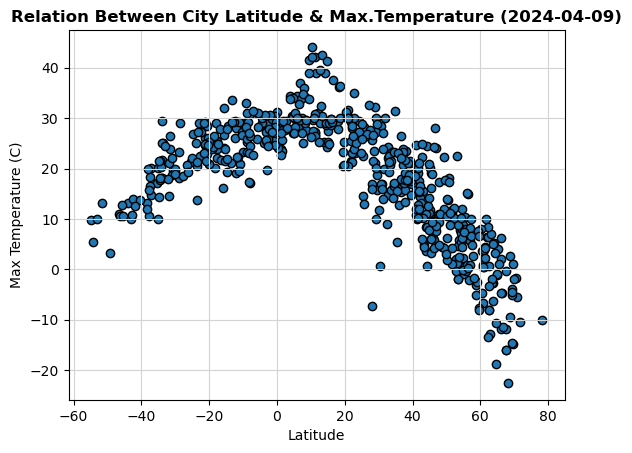

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Relation Between City Latitude & Max.Temperature (2024-04-09)', fontweight='bold')
plt.grid(which='major', axis='both', linestyle='-', color='lightgrey')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

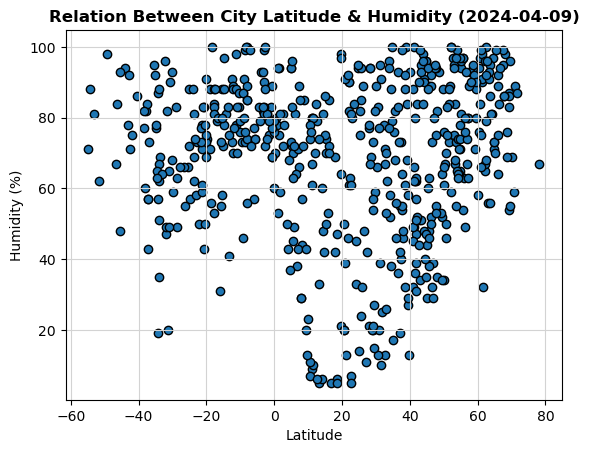

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Relation Between City Latitude & Humidity (2024-04-09)', fontweight='bold')
plt.grid(which='major', axis='both', linestyle='-', color='lightgrey')


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

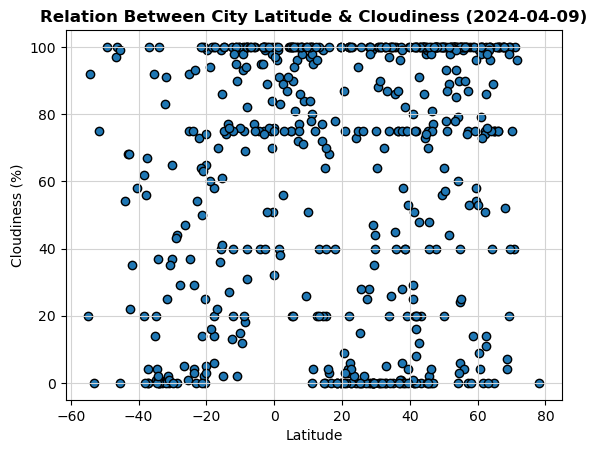

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Relation Between City Latitude & Cloudiness (2024-04-09)', fontweight='bold')
plt.grid(which='major', axis='both', linestyle='-', color='lightgrey')


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

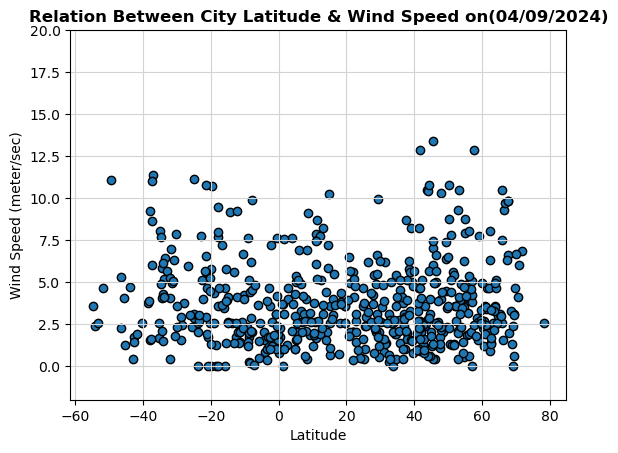

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (meter/sec)')
plt.ylim(-2, 20)
plt.title('Relation Between City Latitude & Wind Speed on(04/09/2024)', fontweight='bold')
plt.grid(which='major', axis='both', linestyle='-', color='lightgrey')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# HOW TO CREATE LINEAR REGRESSION PLOTS
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values, hemisphere):
    # Perform linear regression
  regress_values = stats.linregress(x_values, y_values)

  # Calculate the equation of the best-fit line
  slope = regress_values.slope
  intercept = regress_values.intercept
  line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

  # Create the scatter plot
  plt.scatter(x_values, y_values, edgecolors='black')

  # Plot the best-fit line
  plt.plot(x_values, slope * x_values + intercept, color='r')

  # Add annotations (equation and R-squared)
  plt.annotate(line_eq, (20, 36), fontsize=10, color='r')
  plt.text(20, 35, f'R-squared: {regress_values.rvalue**2:.2f}', fontsize=10, color='r')

  # Customize the plot
  plt.xlabel('Latitude')
  plt.ylabel('Max Temperature (C)')
  plt.title(f'Relation Between City {hemisphere} Hemisphere Latitude & Max.Temperature (2024-04-11)', fontweight='bold')
  plt.grid(which='major', axis='both', linestyle='-', color='lightgrey')  


  # Show the plot
  plt.show()

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,jamestown,42.0970,-79.2353,14.29,84,100,2.06,US,1713365400
5,saipan,15.1355,145.7010,27.39,74,20,3.60,MP,1713365534
6,iqaluit,63.7506,-68.5145,-6.23,86,96,3.56,CA,1713365314
7,mili,6.0815,171.7350,28.17,81,81,6.90,MH,1713365536
8,hinton,53.4001,-117.5857,-1.87,67,100,2.28,CA,1713365536


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-vila,-17.7338,168.3219,25.47,84,100,7.71,VU,1713365531
2,port alfred,-33.5906,26.8910,25.10,69,1,6.46,ZA,1713365532
3,puerto natales,-51.7236,-72.4875,13.25,62,75,4.63,CL,1713365533
4,port-aux-francais,-49.3500,70.2167,3.32,98,100,11.10,TF,1713365533
9,adamstown,-25.0660,-130.1015,21.79,72,92,11.12,PN,1713365537


###  Temperature vs. Latitude Linear Regression Plot

In [19]:
from scipy import stats


In [20]:
regress_values = stats.linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
print(regress_values)

LinregressResult(slope=-0.5822116218647374, intercept=37.46289533765734, rvalue=-0.8703120325715241, pvalue=1.4590090300491703e-123, stderr=0.016577315781611472, intercept_stderr=0.7005480169870406)


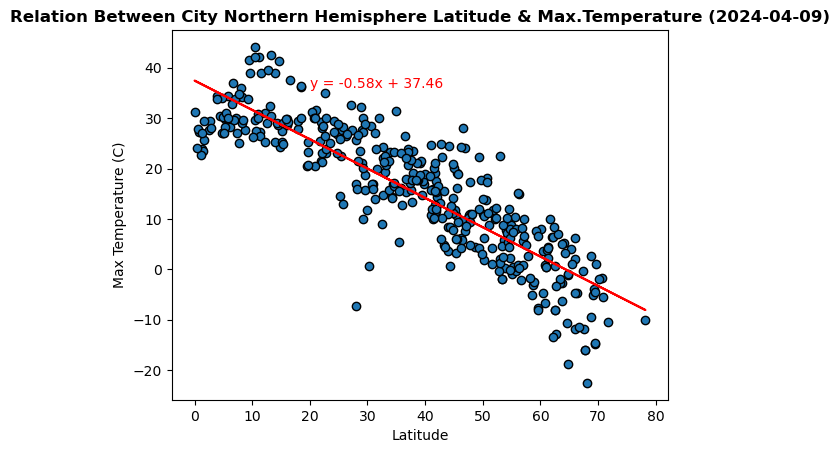

r-value: -0.8703120325715241


In [21]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
regress_values = stats.linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

# equation of line calculation (y = mx +b)
line_eq = "y = " + str(round(regress_values.slope, 2)) + "x + " + str(round(regress_values.intercept, 2))
predicted_y = regress_values.slope * northern_hemi_df["Lat"] + regress_values.intercept

# Create scatter plot
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], edgecolors='black')

# Plot regression line
plt.plot(northern_hemi_df["Lat"], predicted_y, color='r')

# Incorporate the other graph properties
plt.annotate(line_eq, (20,36),fontsize=10, color='r')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Relation Between City Northern Hemisphere Latitude & Max.Temperature (2024-04-09)', fontweight='bold')

# Save the figure
plt.savefig("output_data/Fig5.png")

# Show plot
plt.show()

# Print R-value 
print(f'r-value: {regress_values.rvalue}')

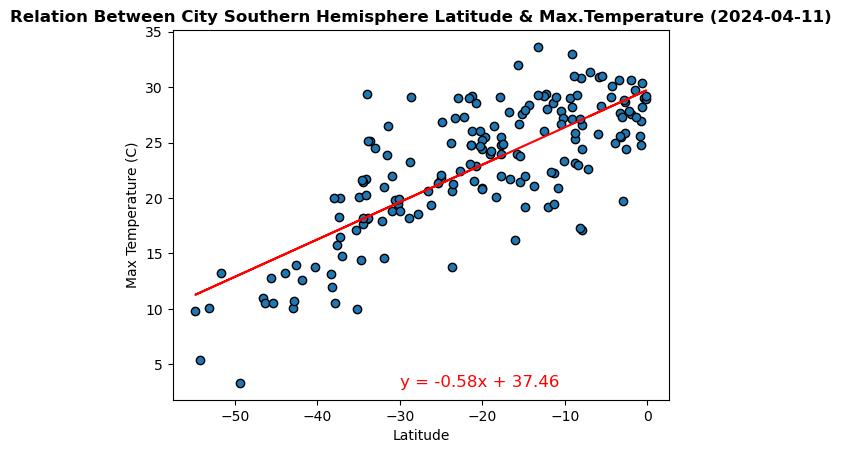

r-value: 0.7708907619710449


In [22]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
regress_values = stats.linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

# equation of line calculation (y = mx +b)
line_equation = "y = " + str(round(regress_values.slope, 2)) + "x + " + str(round(regress_values.intercept, 2))
predicted_y = regress_values.slope * southern_hemi_df["Lat"] + regress_values.intercept

# Create scatter plot
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], edgecolors='black')

# Plot regression line
plt.plot(southern_hemi_df["Lat"], predicted_y, color='r')

# Incorporate the other graph properties
plt.annotate(line_eq, (-30,3),fontsize=12, color='r')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Relation Between City Southern Hemisphere Latitude & Max.Temperature (2024-04-11)', fontweight='bold')

# Save the figure
plt.savefig("output_data/Fig6.png")

# Show plot
plt.show()

# Print R-value 
print(f'r-value: {regress_values.rvalue}')

**Discussion about the linear relationship: The scatter plot maps of Northern & Southern cities temperature  against their latitude using randomly selected cities. The Northen Hemisphere plot depicts a strong negative r-value -0.87 while for the southern hemisphere depicts a strong positive correlation of an r-value 0.77.

### Humidity vs. Latitude Linear Regression Plot

In [43]:
#ensuring we have the same dimensons 
df_dropna = northern_hemi_df.dropna(subset=["Lat", "Humidity"])
df_dropna.count()


City          397
Lat           397
Lng           397
Max Temp      397
Humidity      397
Cloudiness    397
Wind Speed    397
Country       397
Date          397
dtype: int64

In [44]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
#x_values = northern_hemi_df["Lat"]
#y_values = northern_hemi_df["Humidity"]
df_dropna = northern_hemi_df.dropna(subset=["Lat", "Humidity"])
df_dropna

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,jamestown,42.0970,-79.2353,14.29,84,100,2.06,US,1713365400
5,saipan,15.1355,145.7010,27.39,74,20,3.60,MP,1713365534
6,iqaluit,63.7506,-68.5145,-6.23,86,96,3.56,CA,1713365314
7,mili,6.0815,171.7350,28.17,81,81,6.90,MH,1713365536
8,hinton,53.4001,-117.5857,-1.87,67,100,2.28,CA,1713365536
...,...,...,...,...,...,...,...,...,...
564,mermoz boabab,14.7065,-17.4758,41.31,42,0,7.20,SN,1713365980
565,mandalgovi,45.7625,106.2708,9.48,46,48,4.94,MN,1713365981
566,pulandian,39.3953,121.9669,14.83,29,0,1.51,CN,1713365981


In [45]:
# Now use df_dropna for plotting
x_values = df_dropna["Lat"]
y_values = df_dropna["Humidity"]
regress_values = stats.linregress(df_dropna["Lat"], df_dropna["Humidity"])
regress_values

LinregressResult(slope=0.3879526169468214, intercept=51.597468053812975, rvalue=0.30235065667844785, pvalue=7.757121581559513e-10, stderr=0.06153919109206623, intercept_stderr=2.6006115136176007)

In [46]:

# equation of line calculation (y = mx +b)
line_eq = "y = " + str(round(regress_values.slope, 2)) + "x + " + str(round(regress_values.intercept, 2))
predicted_y = regress_values.slope * df_dropna["Lat"] + regress_values.intercept
predicted_y

City_ID
1      67.929109
5      57.469325
6      76.329680
7      53.956802
8      72.314177
         ...    
564    57.302893
565    69.351150
566    66.880978
568    52.081323
570    64.378179
Name: Lat, Length: 397, dtype: float64

LinregressResult(slope=0.3879526169468214, intercept=51.597468053812975, rvalue=0.30235065667844785, pvalue=7.757121581559513e-10, stderr=0.06153919109206623, intercept_stderr=2.6006115136176007)


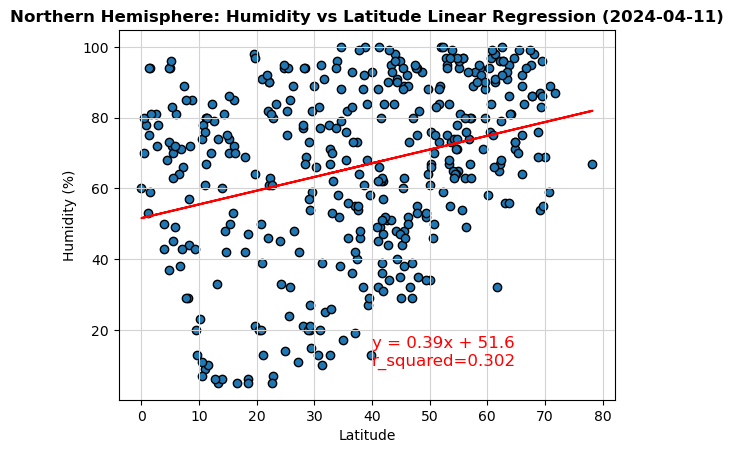

r-value: 0.30235065667844785


In [51]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
df_dropna = northern_hemi_df.dropna(subset=["Lat", "Humidity"]) # Remove any missing values

# Now use df_dropna for plotting
x_values = df_dropna["Lat"]
y_values = df_dropna["Humidity"]
regress_values = stats.linregress(df_dropna["Lat"], df_dropna["Humidity"])
print(regress_values)

# equation of line calculation (y = mx +b)
line_eq = "y = " + str(round(regress_values.slope, 2)) + "x + " + str(round(regress_values.intercept, 2))
predicted_y = regress_values.slope * df_dropna["Lat"] + regress_values.intercept

# Build the scatter plots for latitude vs. humidity
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], edgecolors='black')

# Plot regression line
plt.plot(northern_hemi_df["Lat"].to_numpy(), predicted_y, color='r')

#plot_linear_regression(x_values, y_values, 'Humidity')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere: Humidity vs Latitude Linear Regression (2024-04-11)', fontweight='bold')
plt.grid(which='major', axis='both', linestyle='-', color='lightgrey')
plt.annotate(line_eq, (40,15), fontsize=12, color='r')
plt.annotate(f"r_squared={regress_values.rvalue:.3f}", (40,10), fontsize=12, color='r')



# Save the figure
plt.savefig("output_data/Fig7.png")

# Show plot
plt.show()

# Print R-value 
print(f'r-value: {regress_values.rvalue}')

The p-value associated with the correlation coefficient is extremely small (7.76e-10). This indicates a very high level of statistical significance between the variables. However, the strength of the association is weak as depicted by the low R-squared value.

LinregressResult(slope=0.2592700698108787, intercept=80.08490964782911, rvalue=0.22887205766637345, pvalue=0.0023839531826333605, stderr=0.0840837247433195, intercept_stderr=2.0580290673879134)
r_squared=0.229


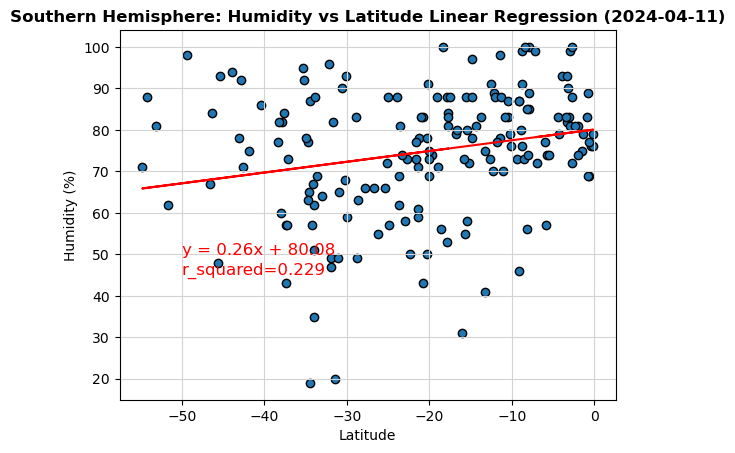

In [50]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

df_dropna = southern_hemi_df.dropna(subset=["Lat", "Humidity"])

# Now use df_dropna for plotting
x_values = df_dropna["Lat"]
y_values = df_dropna["Humidity"]
regress_values = stats.linregress(df_dropna["Lat"], df_dropna["Humidity"])

# equation of line calculation (y = mx +b)
line_eq = "y = " + str(round(regress_values.slope, 2)) + "x + " + str(round(regress_values.intercept, 2))
predicted_y = regress_values.slope * df_dropna["Lat"] + regress_values.intercept

# Build the scatter plots for latitude vs. humidity
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], edgecolors='black')

# Plot regression line
def plot_linear_regression(x_values, y_values, y_label):
    plot_linear_regression(southern_hemi_df["Lat"].to_numpy(), southern_hemi_df["Humidity"].to_numpy(), 'Humidity')

plt.plot(southern_hemi_df["Lat"].to_numpy(), predicted_y, color='r')

#plot_linear_regression(x_values, y_values, 'Humidity')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere: Humidity vs Latitude Linear Regression (2024-04-11)', fontweight='bold')
plt.grid(which='major', axis='both', linestyle='-', color='lightgrey')
plt.annotate(line_eq, (-50,50), fontsize=12, color='r')
plt.annotate(f"r_squared={regress_values.rvalue:.3f}", (-50,45), fontsize=12, color='r')

print(regress_values)
print(f"r_squared={regress_values.rvalue:.3f}")

# Save the figure
plt.savefig("output_data/Fig8.png")

# Show plot
plt.show()


On average, there's a slight tendancy for humidity to increase as we move towards higher latitudes. However, the r-value of 0.229 depicts a  weak positive correlation. The p-value associated with the correlation coefficient is 0.0024 (highly significant)meaning that there's a statistical significance between the variable but it is weak.

### Cloudiness vs. Latitude Linear Regression Plot

Regression line equation is: y =0.15x + 58.13.
r-squared equals: 0.076


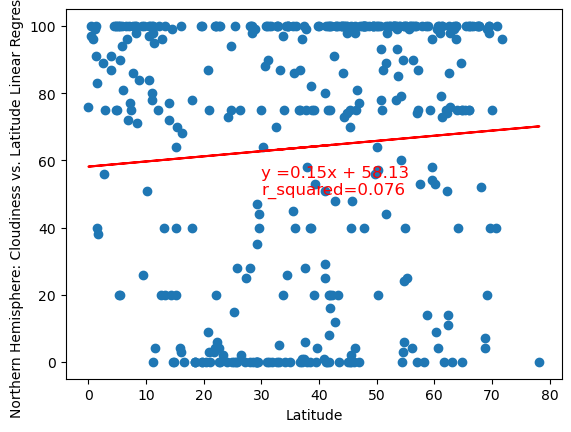

In [31]:
# Northern Hemisphere
#using Northern Hemisphere dataframe, determine the linear regression 
#and converting their values to floats while handling any missing values that might exist. 
x = pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y = pd.to_numeric(northern_hemi_df['Cloudiness']).astype(float)
regress_values = linregress(x,y)

# Equation of line calculation
line_eq = "y =" + str(round(regress_values.slope,2)) + "x + " + str(round(regress_values.intercept,2))
predicted_y = regress_values.slope * x + regress_values.intercept

#Print the line equation and r squared
print(f"Regression line equation is: {line_eq}.")
print(f"r-squared equals: {regress_values.rvalue:.3f}")

# Plot the data
plt.scatter(x,y)
plt.plot(x, predicted_y, color='r')
plt.annotate(line_eq, (30,55), fontsize=12, color='r')
plt.annotate(f"r_squared={regress_values.rvalue:.3f}", (30,50), fontsize=12, color='r')
plt.xlabel('Latitude')
plt.ylabel('Northern Hemisphere: Cloudiness vs. Latitude Linear Regression')

#save the image
plt.savefig("output_data/Fig9.png")

# Show plot
plt.show()

The positive slope of 0.15 indicates a slight positive asociation between Latitude and Cloudiness.However, the r-value of 0.076 indicates a statistically very weak positive correlation. This suggests that other factors may be greater influence to the y.

Regression line equation is: y =1.09x + 77.46.
r-squared equals: 0.390


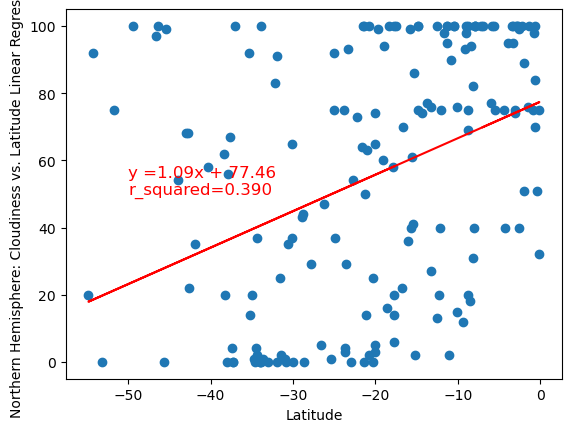

In [32]:
# Southern Hemisphere
#using Northern Hemisphere dataframe, determine the linear regression 
#and converting their values to floats while handling any missing values that might exist. 
x = pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y = pd.to_numeric(southern_hemi_df['Cloudiness']).astype(float)
regress_values = linregress(x,y)

# Equation of line calculation
line_eq = "y =" + str(round(regress_values.slope,2)) + "x + " + str(round(regress_values.intercept,2))
predicted_y = regress_values.slope * x + regress_values.intercept

#Print the line equation and r squared
print(f"Regression line equation is: {line_eq}.")
print(f"r-squared equals: {regress_values.rvalue:.3f}")

# Plot the data
plt.scatter(x,y)
plt.plot(x, predicted_y, color='r')
plt.annotate(line_eq, (-50,55), fontsize=12, color='r')
plt.annotate(f"r_squared={regress_values.rvalue:.3f}", (-50,50), fontsize=12, color='r')
plt.xlabel('Latitude')
plt.ylabel('Northern Hemisphere: Cloudiness vs. Latitude Linear Regression')

#save the image
plt.savefig("output_data/Fig10.png")

# Show plot
plt.show()

**Discussion about the linear relationship:The positive slope (1.09) in the regression line suggests a weak positive association between latitude and humidity. On average, there's a slight tendency for humidity to increase as we move towards higher latitudes in the Northern Hemisphere (based on this specific data). However, the R-squared value of 0.390 is relatively low, indicating that the linear relationship explains a modest portion of the variation in humidity. Other factors likely play a more significant role in influencing humidity levels across different latitudes.

### Wind Speed vs. Latitude Linear Regression Plot

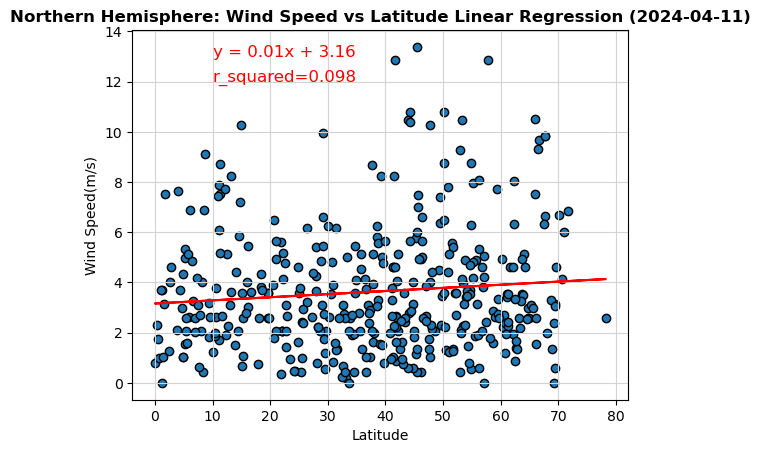

r-value: 0.098192


In [36]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
df_dropna = northern_hemi_df.dropna(subset=["Lat", "Wind Speed"]) # Remove any missing values

# Now use df_dropna for plotting
x_values = df_dropna["Lat"]
y_values = df_dropna["Wind Speed"]
regress_values = stats.linregress(df_dropna["Lat"], df_dropna["Wind Speed"])

# equation of line calculation (y = mx +b)
line_eq = "y = " + str(round(regress_values.slope, 2)) + "x + " + str(round(regress_values.intercept, 2))
predicted_y = regress_values.slope * df_dropna["Lat"] + regress_values.intercept

# Build the scatter plots for latitude vs. humidity
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], edgecolors='black')

# Plot regression line
plt.plot(northern_hemi_df["Lat"].to_numpy(), predicted_y, color='r')

#plot_linear_regression(x_values, y_values, 'Humidity')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')
plt.title('Northern Hemisphere: Wind Speed vs Latitude Linear Regression (2024-04-11)', fontweight='bold')
plt.grid(which='major', axis='both', linestyle='-', color='lightgrey')
plt.annotate(line_eq, (10,13), fontsize=12, color='r')
plt.annotate(f"r_squared={regress_values.rvalue:.3f}", (10,12), fontsize=12, color='r')



# Save the figure
plt.savefig("output_data/Fig11.png")

# Show plot
plt.show()

# Print R-value 
print(f'r-value: {regress_values.rvalue:3f}')

The scatter plot above of wind speed vs latitude seems to show little relationship beteen wind speed and latitude of southern hemisphere. This is depicted by the linear regression with an r-value of 0.098, showing a weak positive correlation.

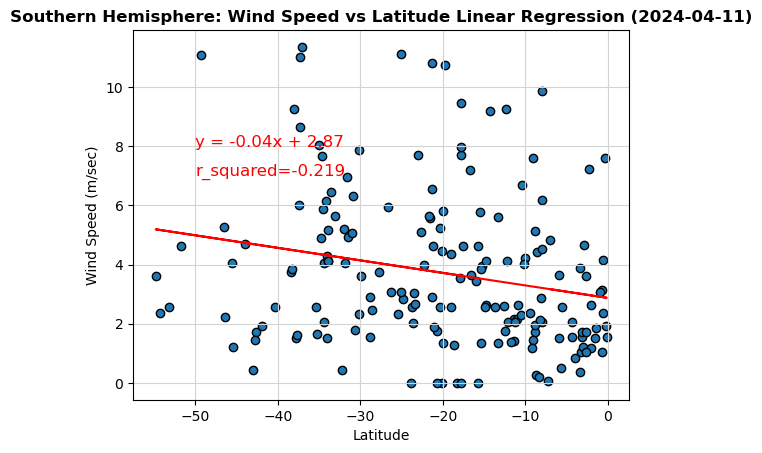

r-value: -0.21947964476451443


In [37]:
# Southern Hemisphere
# Linear regression on Northern Hemisphere
df_dropna = southern_hemi_df.dropna(subset=["Lat", "Wind Speed"]) # Remove any missing values

# Now use df_dropna for plotting
x_values = df_dropna["Lat"]
y_values = df_dropna["Wind Speed"]
regress_values = stats.linregress(df_dropna["Lat"], df_dropna["Wind Speed"])

# equation of line calculation (y = mx +b)
line_eq = "y = " + str(round(regress_values.slope, 2)) + "x + " + str(round(regress_values.intercept, 2))
predicted_y = regress_values.slope * df_dropna["Lat"] + regress_values.intercept

# Build the scatter plots for latitude vs. humidity
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], edgecolors='black')

# Plot regression line
plt.plot(southern_hemi_df["Lat"].to_numpy(), predicted_y, color='r')

#plot_linear_regression(x_values, y_values, 'Humidity')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/sec)')
plt.title('Southern Hemisphere: Wind Speed vs Latitude Linear Regression (2024-04-11)', fontweight='bold')
plt.grid(which='major', axis='both', linestyle='-', color='lightgrey')
plt.annotate(line_eq, (-50,8), fontsize=12, color='r')
plt.annotate(f"r_squared={regress_values.rvalue:.3f}", (-50,7), fontsize=12, color='r')



# Save the figure
plt.savefig("output_data/Fig12.png")

# Show plot
plt.show()

# Print R-value 
print(f'r-value: {regress_values.rvalue}')

This scatter plot with a linear regression line suggests a general trend of decreasing wind speed with increasing latitude in the Southern Hemisphere, which is supported by the weak negative r-value of -0.219.